# **DL PROJECT**

Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping
from tensorflow.keras.regularizers import l2 # Import L2 regularizer


Dataset Exploration

In [4]:
df = pd.read_csv("/content/drive/MyDrive/DL_Project/travel_preferences_augmented.csv")
df.head()


,departure_city,start_date,duration_days,num_people,budget_per_person_inr,preferred_pace,accommodation_style,interests,destination
0,Delhi,21-09-26,5,1,43927,Balanced,Luxury Hotels,Beaches|Culture|Spiritual,Bali
1,Jaipur,02-03-26,4,2,89467,Balanced,Luxury Hotels,Nightlife|Spiritual,Dubai
2,Kochi,09-09-26,6,6,26485,Balanced,Private Apartments,Adventure|Culture,Da Nang
3,Pune,26-08-26,4,3,32995,Balanced,Mid-range Hotels,Adventure|Culture|Nature,Da Nang
4,Kolkata,10-11-25,3,4,45205,Relaxed,Private Apartments,Beaches|Spiritual,Langkawi


In [5]:
print("Columns:", df.columns.tolist())
print("\nShape:", df.shape)
print("\nNull Values:\n", df.isnull().sum())
df.describe(include='all')


Columns: ['departure_city', 'start_date', 'duration_days', 'num_people', 'budget_per_person_inr', 'preferred_pace', 'accommodation_style', 'interests', 'destination']

Shape: (690, 9)

Null Values:
 departure_city           0
start_date               0
duration_days            0
num_people               0
budget_per_person_inr    0
preferred_pace           0
accommodation_style      0
interests                0
destination              0
dtype: int64


,departure_city,start_date,duration_days,num_people,budget_per_person_inr,preferred_pace,accommodation_style,interests,destination
count,690,690,690.000000,690.000000,690.000000,690,690,690,690
unique,10,267,NaN,NaN,NaN,3,4,88,20
top,Mumbai,01-09-26,NaN,NaN,NaN,Balanced,Private Apartments,Nature,Varanasi
freq,93,11,NaN,NaN,NaN,335,221,58,44
mean,NaN,NaN,4.618841,3.453623,38902.392754,NaN,NaN,NaN,NaN
std,NaN,NaN,1.745305,1.778364,24488.608275,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000,10944.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.000000,2.000000,20966.750000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,3.000000,31429.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,6.000000,5.000000,50141.000000,NaN,NaN,NaN,NaN


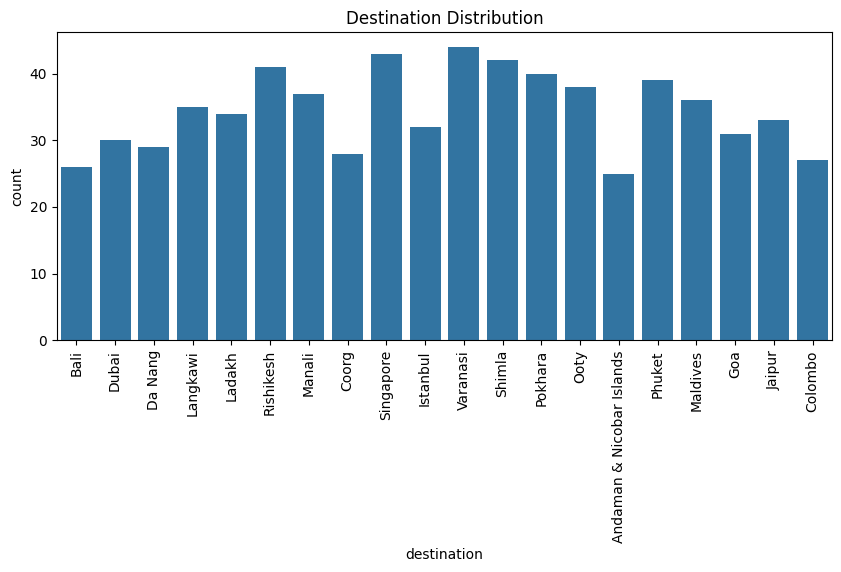

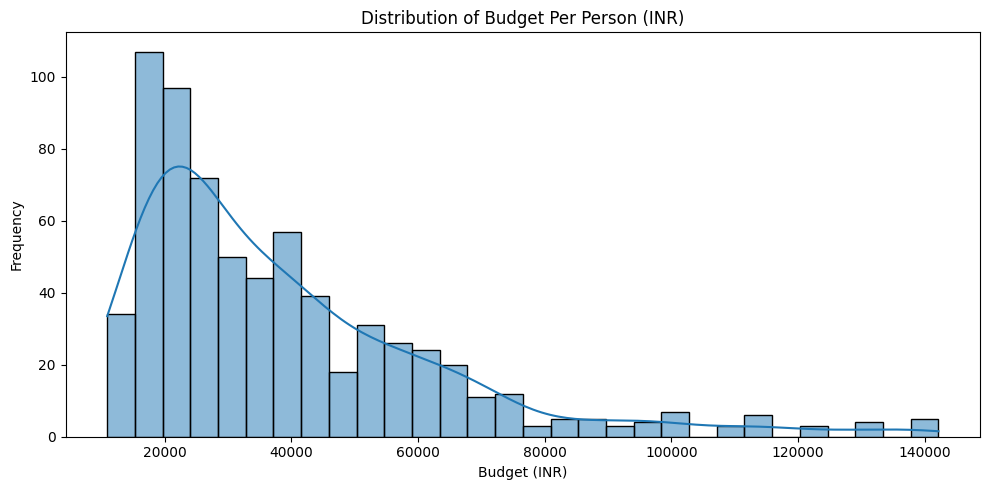

/tmp/ipython-input-698261247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='preferred_pace', order=df['preferred_pace'].value_counts().index, palette='crest')


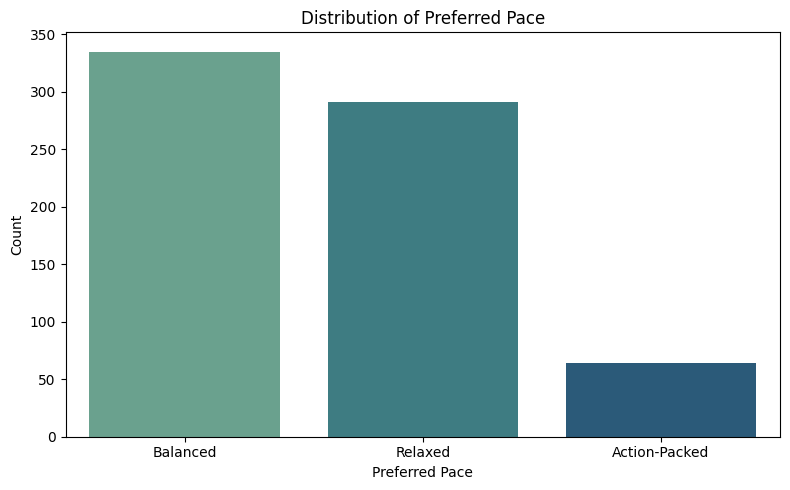

In [22]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="destination")
plt.xticks(rotation=90)
plt.title("Destination Distribution")
plt.show()

# Plot 2: Budget Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='budget_per_person_inr', kde=True, bins=30)
plt.title('Distribution of Budget Per Person (INR)')
plt.xlabel('Budget (INR)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot 3: Preferred Pace Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='preferred_pace', order=df['preferred_pace'].value_counts().index, palette='crest')
plt.title('Distribution of Preferred Pace')
plt.xlabel('Preferred Pace')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [7]:
for col in df.columns:
    print(col, "→", df[col].nunique(), "unique values")


departure_city → 10 unique values
start_date → 267 unique values
duration_days → 12 unique values
num_people → 6 unique values
budget_per_person_inr → 498 unique values
preferred_pace → 3 unique values
accommodation_style → 4 unique values
interests → 88 unique values
destination → 20 unique values


Dataset and Feature Engineering

In [8]:
# --- 1. Dataset Loading and Feature Engineering ---

try:
    # IMPORTANT: Update this path to where your file is located
    df = pd.read_csv("/content/drive/MyDrive/DL_Project/travel_preferences_augmented.csv")
except FileNotFoundError:
    print("Error: 'travel_preferences_augmented.csv' not found.")
    print("Please make sure the file is in the same directory or update the file path.")
    exit()

print("Original Data Head:\n", df.head())

# --- Feature Engineering ---

# 1. Handle 'interests' column
# Split 'Beaches|Nature' into separate columns: interest_Beaches, interest_Nature
if 'interests' in df.columns:
    interest_dummies = df['interests'].str.get_dummies(sep='|')
    interest_dummies.columns = [f'interest_{col}' for col in interest_dummies.columns]
    df = pd.concat([df, interest_dummies], axis=1)
    df = df.drop('interests', axis=1)
    print("\nData after processing 'interests' column.")

# 2. Handle 'start_date' column
# Convert to datetime and extract the month. Seasonality is a good feature.
if 'start_date' in df.columns:
    df['start_date'] = pd.to_datetime(df['start_date'])
    df['start_month'] = df['start_date'].dt.month
    df = df.drop('start_date', axis=1)
    print("Data after processing 'start_date' column.")

print("\n--- Data after Feature Engineering ---")
print(df.head())


Original Data Head:
   departure_city start_date  duration_days  num_people  budget_per_person_inr  \
0          Delhi   21-09-26              5           1                  43927   
1         Jaipur   02-03-26              4           2                  89467   
2          Kochi   09-09-26              6           6                  26485   
3           Pune   26-08-26              4           3                  32995   
4        Kolkata   10-11-25              3           4                  45205   

  preferred_pace accommodation_style                  interests destination  
0       Balanced       Luxury Hotels  Beaches|Culture|Spiritual        Bali  
1       Balanced       Luxury Hotels        Nightlife|Spiritual       Dubai  
2       Balanced  Private Apartments          Adventure|Culture     Da Nang  
3       Balanced    Mid-range Hotels   Adventure|Culture|Nature     Da Nang  
4        Relaxed  Private Apartments          Beaches|Spiritual    Langkawi  

Data after processing '

/tmp/ipython-input-981758928.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'])


Splitting the dataset

In [9]:
# --- 2. Define Features (X) and Target (y) ---

X = df.drop("destination", axis=1)
y = df["destination"]
# --- 3. Split Data BEFORE Preprocessing ---
# This is critical to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify=y is good for imbalanced classes
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")



Training set shape: (552, 15)
Test set shape: (138, 15)


Preprocessing

In [10]:
# --- 4. Preprocessing with ColumnTransformer ---

# Identify column types from the feature-engineered X_train
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

# Any interest columns we created are already numeric (0/1), but StandardScaler won't hurt them.
# Let's refine this to be more precise.
interest_features = [col for col in X_train.columns if col.startswith('interest_')]
date_features = ['start_month'] # This is numeric

# Remove interest and date features from the main lists to treat them separately if needed
# For simplicity, we'll treat them all as standard numeric features
numeric_features = ['duration_days', 'num_people', 'budget_per_person_inr', 'start_month']
# Add interest features to the numeric list as they are already 0/1
numeric_features.extend(interest_features)

categorical_features = ['departure_city', 'preferred_pace', 'accommodation_style']

print("\nIdentified Numeric Features:")
print(numeric_features)
print("\nIdentified Categorical Features:")
print(categorical_features)

# Create the preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # 'ignore' prevents errors on unseen test categories
])

# Create the master preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Pass through any columns we didn't list
)

# --- 5. Apply Preprocessing ---

# Fit the preprocessor ONLY on the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted preprocessor
X_test_processed = preprocessor.transform(X_test)

# Convert from sparse matrix to dense array if necessary
if not isinstance(X_train_processed, np.ndarray):
    X_train_processed = X_train_processed.toarray()
if not isinstance(X_test_processed, np.ndarray):
    X_test_processed = X_test_processed.toarray()

print(f"\nProcessed training data shape: {X_train_processed.shape}")
print(f"Processed test data shape: {X_test_processed.shape}")



Identified Numeric Features:
['duration_days', 'num_people', 'budget_per_person_inr', 'start_month', 'interest_Adventure', 'interest_Beaches', 'interest_Culture', 'interest_Food', 'interest_History', 'interest_Nature', 'interest_Nightlife', 'interest_Spiritual']

Identified Categorical Features:
['departure_city', 'preferred_pace', 'accommodation_style']

Processed training data shape: (552, 29)
Processed test data shape: (138, 29)


Encoding

In [11]:
# --- 6. Encode Labels ---
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)
print(f"\nFound {num_classes} destination classes.")



Found 20 destination classes.


Model Building

In [17]:
# --- 7. Build and Train Model (with Regularization) ---
model = Sequential([
    Dense(64, activation='relu',
          input_shape=(X_train_processed.shape[1],),
          kernel_regularizer=l2(0.001)), # Added L2 regularization
    Dropout(0.3),
    Dense(32, activation='relu',
          kernel_regularizer=l2(0.001)), # Added L2 regularization
    Dropout(0.2),
    Dense(num_classes, activation='softmax') # Use num_classes for the output
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=10,            # Stop if val_loss doesn't improve for 10 epochs
    restore_best_weights=True, # Give us the model from the best epoch
    verbose=1
)

print("\n--- Starting Model Training ---")
history = model.fit(
    X_train_processed, y_train_encoded,
    epochs=200, # Increase epochs; EarlyStopping will find the best one
    validation_split=0.2, # Validation split on the *processed* training data
    batch_size=32,
    callbacks=[early_stopping], # Add the callback here
    verbose=1
)



--- Starting Model Training ---
Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0609 - loss: 3.1666 - val_accuracy: 0.0541 - val_loss: 3.0632
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0685 - loss: 3.0669 - val_accuracy: 0.0631 - val_loss: 3.0204
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1245 - loss: 2.9780 - val_accuracy: 0.1171 - val_loss: 2.9803
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1262 - loss: 2.9506 - val_accuracy: 0.1622 - val_loss: 2.9402
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1550 - loss: 2.8951 - val_accuracy: 0.1712 - val_loss: 2.8978
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2068 - loss: 2.8227 - val_accuracy: 0.2342 - val_loss: 2.8477
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2215 - loss: 2.7717 - val_accuracy: 0.2703 - val_loss: 2.7967
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2709 - loss: 2.6812 - val_accuracy: 0.2432 - val_loss: 2

Evaluating

In [18]:
# --- 8. Evaluate Model ---
print("\n--- Evaluating on Test Set (using best weights) ---")
loss, accuracy = model.evaluate(X_test_processed, y_test_encoded, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Detailed Classification Report
y_pred_probs = model.predict(X_test_processed)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n--- Classification Report ---")
# Get original class names for the report
target_names = label_encoder.classes_
print(classification_report(y_test_encoded, y_pred, target_names=target_names))



--- Evaluating on Test Set (using best weights) ---

Test Loss: 1.0407
Test Accuracy: 0.7464
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

--- Classification Report ---
                           precision    recall  f1-score   support

Andaman & Nicobar Islands       0.50      0.20      0.29         5
                     Bali       0.25      0.20      0.22         5
                  Colombo       1.00      0.40      0.57         5
                    Coorg       1.00      0.33      0.50         6
                  Da Nang       0.50      0.33      0.40         6
                    Dubai       1.00      1.00      1.00         6
                      Goa       1.00      0.50      0.67         6
                 Istanbul       0.80      0.67      0.73         6
                   Jaipur       0.83      0.71      0.77         7
                   Ladakh       0.88      1.00      0.93         7
                 Langkawi       0.86      0.86      0.86         7
                 Maldives       

Plotting


--- Plotting Training History ---


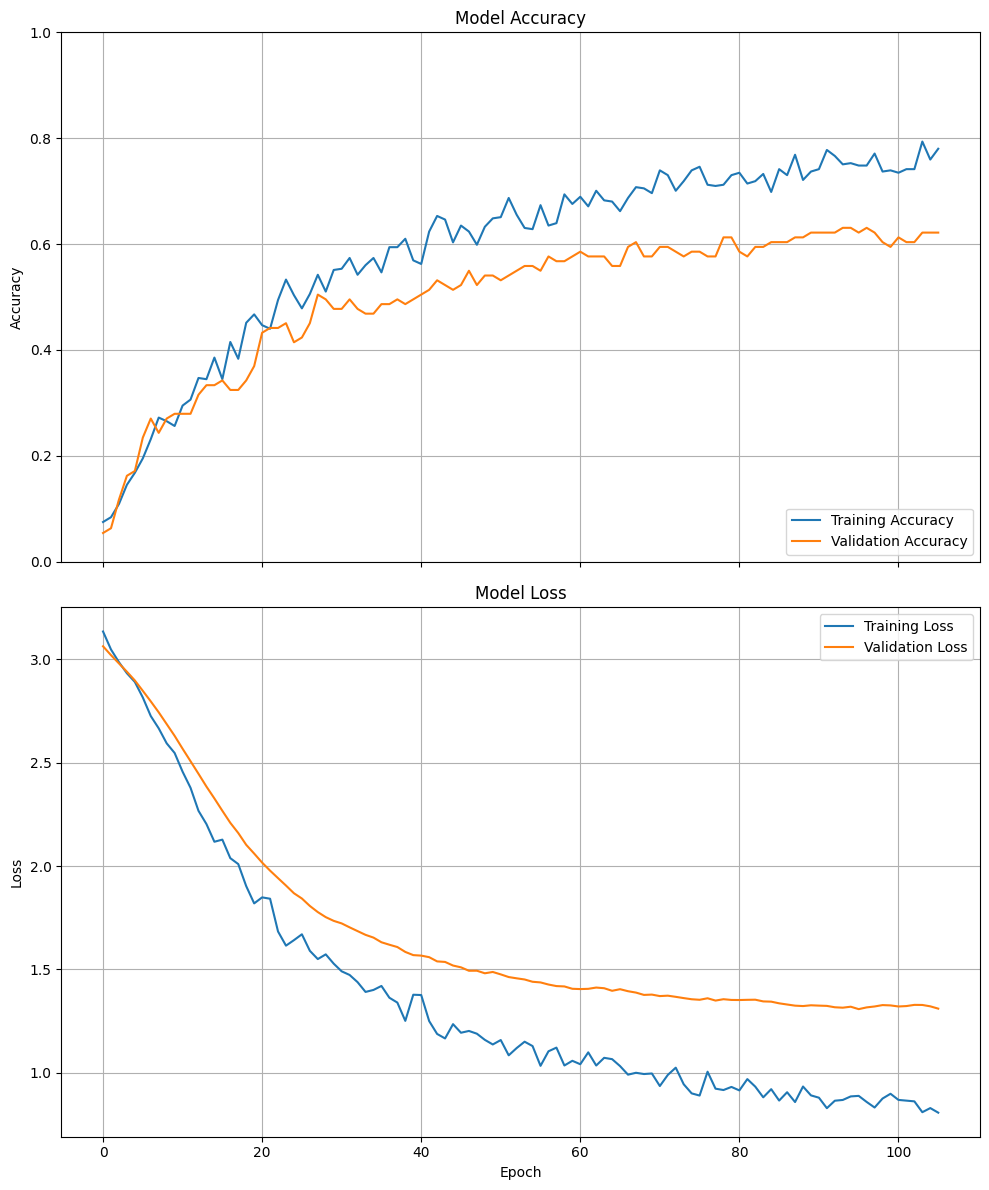

In [20]:
# --- 9. Plot Training History (More Detailed) ---
print("\n--- Plotting Training History ---")

# Get history data
history_df = pd.DataFrame(history.history)

# Check if validation keys exist (they should, since validation_split is used)
has_validation = 'val_loss' in history_df.columns

# Create a figure with two subplots, one above the other
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# --- Plot 1: Accuracy ---
ax1.plot(history_df['accuracy'], label='Training Accuracy')
if has_validation:
    ax1.plot(history_df['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')
ax1.grid(True)
ax1.set_ylim([0, 1]) # Accuracy is always between 0 and 1

# --- Plot 2: Loss ---
ax2.plot(history_df['loss'], label='Training Loss')
if has_validation:
    ax2.plot(history_df['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper right')
ax2.grid(True)
# We DON'T set ylim here, so matplotlib can auto-scale to show the lines

plt.tight_layout() # Prevents plots from overlapping
plt.show()
